In [1]:
# !pip install dash
# !pip install dash-bootstrap-components
# !pip install joblib
# !pip install mlflow
# !pip install xgboost
# !pip install seaborn
# !pip install imbalanced-learn
# !pip install python-dotenv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import mlflow
import mlflow.sklearn
import itertools

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

# from xgboost import XGBRegressor

In [5]:
loaded_cars=pd.read_csv("Cars.csv", index_col=None)

In [6]:
loaded_cars.shape

(8128, 13)

In [7]:
loaded_cars.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
def carOwnerNumber(numStr):
  labels={"First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner":4, "Test Drive Car":5}
  return labels[numStr]

loaded_cars['owner']=loaded_cars['owner'].apply(carOwnerNumber)
loaded_cars.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:

print(loaded_cars.shape)
loaded_cars = loaded_cars.drop(loaded_cars[(loaded_cars['fuel'] == 'CNG') | (loaded_cars['fuel'] == 'LPG')].index)
print(loaded_cars.shape)
loaded_cars.head()


(8128, 13)
(8033, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
loaded_cars['mileage']=loaded_cars['mileage'].str.replace(' kmpl','').astype(float)
loaded_cars['engine']=loaded_cars['engine'].str.replace(' CC','').astype(float)
loaded_cars['max_power']=loaded_cars['max_power'].str.replace(' bhp','').astype(float)
loaded_cars['name']=loaded_cars['name'].str.split(" ").str[0]
loaded_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
null_count=loaded_cars.isnull().sum()
null_count

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
torque           214
seats            214
dtype: int64

In [12]:
loaded_cars['mileage'] = loaded_cars['mileage'].fillna(loaded_cars['mileage'].median())
loaded_cars['engine'] = loaded_cars['engine'].fillna(loaded_cars['engine'].median())
loaded_cars['max_power'] = loaded_cars['max_power'].fillna(loaded_cars['max_power'].median())
loaded_cars['seats'] = loaded_cars['seats'].fillna(loaded_cars['seats'].median())


In [13]:
medians = {
    "year": loaded_cars['year'].median(),
    "mileage": loaded_cars['mileage'].median(),
    "max_power": loaded_cars['max_power'].median()
}
joblib.dump(medians, "medians.pkl")

['medians.pkl']

In [14]:
loaded_cars.drop(['torque'],axis=1,inplace=True)
loaded_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [15]:
null_count=loaded_cars.isnull().sum()
null_count

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [16]:
unique_cars=loaded_cars['name'].unique()
print(len(unique_cars)," unique car names")
unique_cars

32  unique car names


array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [17]:
print(loaded_cars.shape)
loaded_cars.drop(loaded_cars[loaded_cars['owner']==5].index, inplace=True)
print(loaded_cars.shape)
loaded_cars.head()

(8033, 12)
(8028, 12)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [18]:
import seaborn as sns


In [19]:
loaded_cars.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000
mean,2013.815521,6.403937e+05,6.977314e+04,1.458022,19.389510,1457.185725,91.575667,5.410314
std,4.030836,8.027015e+05,5.664419e+04,0.715283,3.948293,499.187790,35.369251,0.952623
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,16.800000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,22.100000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000


In [20]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

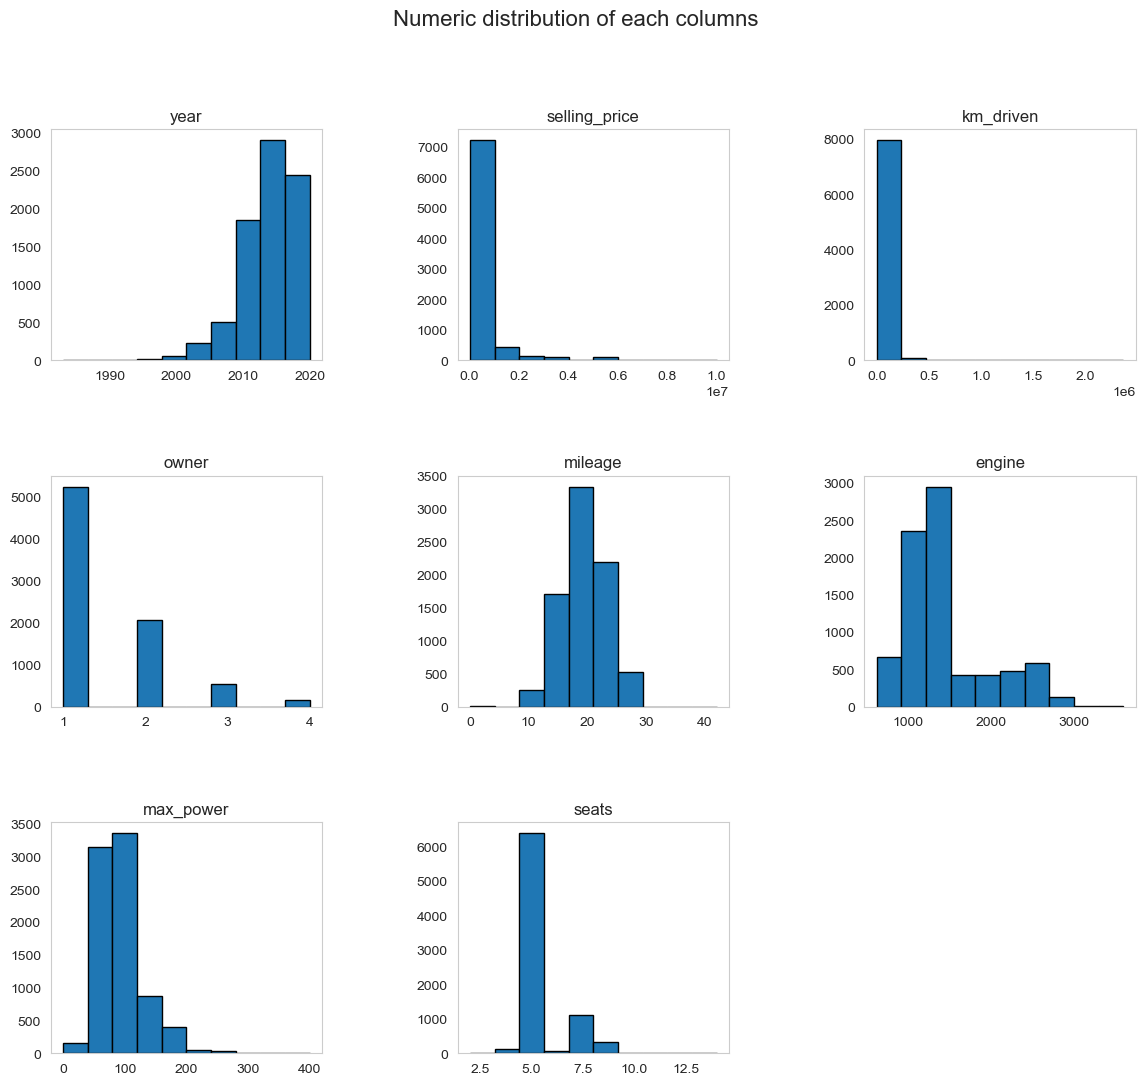

In [21]:
ax = loaded_cars.hist(figsize=(14, 12), edgecolor='black', grid=False)
plt.suptitle("Numeric distribution of each columns",fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [22]:
numeric_columns=loaded_cars.select_dtypes(include=['int','float']).columns
numeric_columns

Index(['year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object')

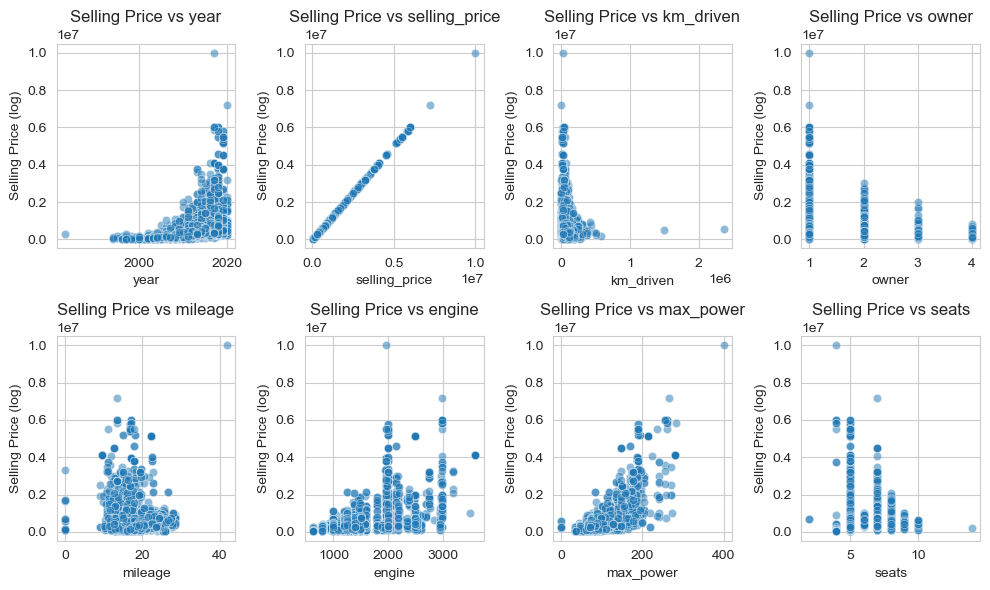

In [23]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(numeric_columns, 1):

    plt.subplot(2, 4, i)
    sns.scatterplot(x=loaded_cars[col], y=loaded_cars["selling_price"], alpha=0.5)
    plt.title(f"Selling Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Selling Price (log)")

plt.tight_layout()
plt.show()

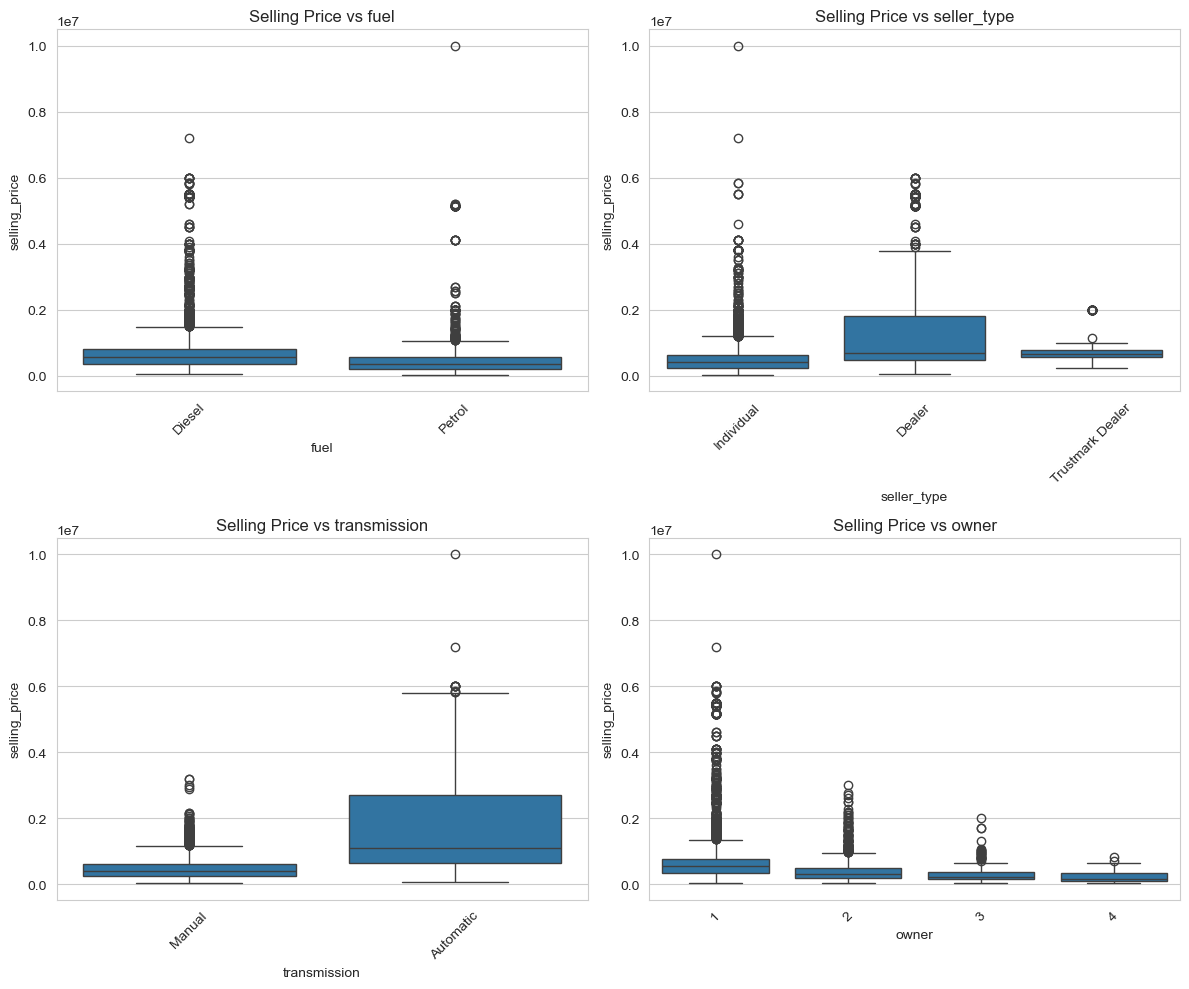

In [24]:
cat_features = ["fuel", "seller_type", "transmission", "owner"]

plt.figure(figsize=(12, 10))

for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=loaded_cars[col], y=loaded_cars["selling_price"])
    plt.title(f"Selling Price vs {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

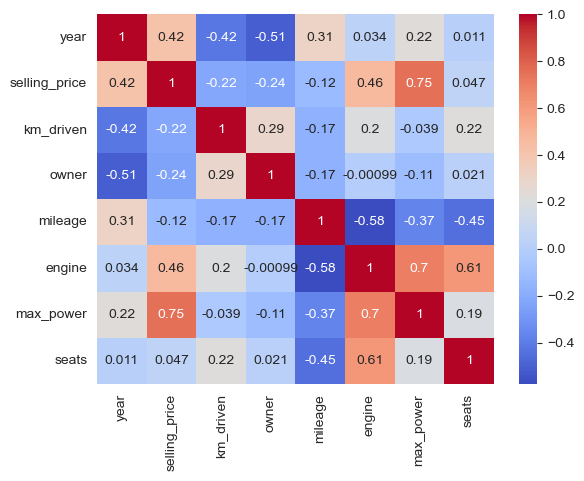

In [25]:
# loaded_cars[numeric_columns].corr()
sns.heatmap(loaded_cars[numeric_columns].corr(), annot=True, cmap="coolwarm")

In [26]:
# loaded_cars = pd.get_dummies(loaded_cars, columns=['fuel', 'transmission', 'seller_type'], drop_first=True)

In [27]:

X = loaded_cars[['max_power','mileage','year']]

labels=[0,1,2,3]
max_selling_price=loaded_cars['selling_price'].max()
minimum_selling_price=loaded_cars['selling_price'].min()

#creating bins using np.linspace
bins=np.linspace(minimum_selling_price,max_selling_price+1,5) 

y=pd.cut(loaded_cars['selling_price'],bins=bins,labels=labels,include_lowest=True)


# Normalize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
# X_train = X_train.values
# y_train = y_train.values

joblib.dump(scaler,'scaler_a3.pkl')


['scaler_a3.pkl']

In [28]:
# Add intercept to X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [29]:
# k=len(labels)
k=len(set(y))
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))

for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [ ]:
# plt.figure(figsize=(6,6))
# plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
# plt.show()

In [31]:
# importances = grid_search.best_estimator_.feature_importances_
# feat_names = X.columns
# sns.barplot(x=importances, y=feat_names)
# plt.title("Feature Importances")
# plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time

class MultinomialLogisticRegression:
    def __init__(self, n_classes, n_features, lr=0.01, max_iter=2000, 
                 method='batch', batch_frac=0.3, l2_lambda=0.0, verbose=False):
        """
        n_classes: number of target classes
        n_features: number of columns in X (including intercept)
        method: 'batch', 'minibatch', 'sto' (stochastic)
        l2_lambda: L2 regularization strength
        """
        self.k = n_classes
        self.n = n_features
        self.lr = lr
        self.max_iter = max_iter
        self.method = method
        self.batch_frac = batch_frac
        self.l2 = l2_lambda
        self.verbose = verbose
        self.W = np.random.randn(self.n, self.k) * 0.01
        self.losses = []

    # -----------------------------
    # Core Computations
    # -----------------------------
    def softmax(self, z):
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def h_theta(self, X):
        return self.softmax(X @ self.W)

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X)
        eps = 1e-12
        ce_loss = -np.sum(Y * np.log(h + eps)) / m
        # L2 regularization (ignore intercept)
        W_no_intercept = self.W.copy()
        W_no_intercept[0, :] = 0.0
        l2_loss = 0.5 * (self.l2 / m) * np.sum(W_no_intercept**2)
        total_loss = ce_loss + l2_loss
        grad = (X.T @ (h - Y)) / m
        if self.l2 != 0:
            grad += (self.l2 / m) * W_no_intercept
        return total_loss, grad

    # -----------------------------
    # Fit methods
    # -----------------------------
    def fit(self, X, Y):
        m = X.shape[0]
        start_time = time.time()

        if self.method == "batch":
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.W -= self.lr * grad
                self.losses.append(loss)
                if self.verbose and i % 500 == 0:
                    print(f"[Batch] Iter {i}, Loss: {loss:.6f}")

        elif self.method == "minibatch":
            batch_size = max(1, int(self.batch_frac * m))
            for i in range(self.max_iter):
                ix = np.random.randint(0, m, batch_size)
                Xb, Yb = X[ix], Y[ix]
                loss, grad = self.gradient(Xb, Yb)
                self.W -= self.lr * grad
                self.losses.append(loss)
                if self.verbose and i % 500 == 0:
                    print(f"[MiniBatch] Iter {i}, Loss: {loss:.6f}")

        elif self.method == "sto":
            for i in range(self.max_iter):
                idx = np.random.randint(0, m)
                Xs = X[idx:idx+1]
                Ys = Y[idx:idx+1]
                loss, grad = self.gradient(Xs, Ys)
                self.W -= self.lr * grad
                self.losses.append(loss)
                if self.verbose and i % 1000 == 0:
                    print(f"[Stochastic] Iter {i}, Loss: {loss:.6f}")

        else:
            raise ValueError('Method must be "batch", "minibatch", or "sto".')

        print(f"Training completed in {time.time() - start_time:.2f}s")

    # -----------------------------
    # Predictions & Evaluation
    # -----------------------------
    def predict_proba(self, X):
        return self.h_theta(X)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def plot_losses(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Training Loss")
        plt.title("Loss Curve")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()


In [33]:
def classification_report_custom(y_true, y_pred):
    labels = np.unique(y_true)
    per_class = {}
    for label in labels:
        tp = np.sum((y_pred == label) & (y_true == label))
        fp = np.sum((y_pred == label) & (y_true != label))
        fn = np.sum((y_pred != label) & (y_true == label))

        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        f1 = 2 * precision * recall / (precision + recall + 1e-9)
        per_class[label] = {"precision": precision, "recall": recall, "f1": f1}

    # macro average
    macro = {k: np.mean([v[k] for v in per_class.values()]) for k in ["precision", "recall", "f1"]}

    # weighted average
    weights = [np.sum(y_true == label) for label in labels]
    total = np.sum(weights)
    weighted = {
        k: np.sum([v[k] * w for v, w in zip(per_class.values(), weights)]) / total
        for k in ["precision", "recall", "f1"]
    }

    return per_class, macro, weighted


[MiniBatch] Iter 0, Loss: 1.385870
[MiniBatch] Iter 500, Loss: 0.087312
[MiniBatch] Iter 1000, Loss: 0.070091
[MiniBatch] Iter 1500, Loss: 0.071115
[MiniBatch] Iter 2000, Loss: 0.057791
[MiniBatch] Iter 2500, Loss: 0.060295
Training completed in 0.94s


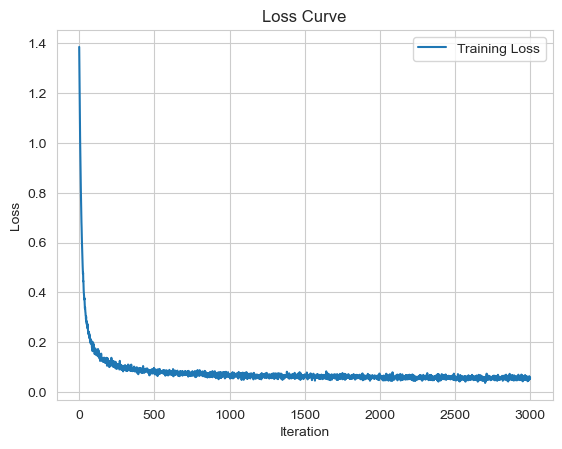


=== Custom Metrics (Test) ===
Accuracy: 0.9651

Class 0: precision=0.9833, recall=0.9967, f1=0.9900
Class 1: precision=0.3243, recall=0.2857, f1=0.3038
Class 2: precision=0.5833, recall=0.2593, f1=0.3590
Class 3: precision=0.0000, recall=0.0000, f1=0.0000

Macro Avg:
Precision=0.4727, Recall=0.3854, F1=0.4132

Weighted Avg:
Precision=0.9587, Recall=0.9651, F1=0.9608

=== Sklearn classification_report (Test) ===
              precision    recall  f1-score   support

           0     0.9833    0.9967    0.9900      1536
           1     0.3243    0.2857    0.3038        42
           2     0.5833    0.2593    0.3590        27
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.9651      1606
   macro avg     0.4727    0.3854    0.4132      1606
weighted avg     0.9587    0.9651    0.9608      1606

Confusion matrix:
 [[1531    5    0    0]
 [  26   12    4    0]
 [   0   20    7    0]
 [   0    0    1    0]]


c:\Users\gaurav\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gaurav\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gaurav\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train model
model = MultinomialLogisticRegression(
    n_features=n, 
    n_classes=k, 
    lr=0.1, 
    max_iter=3000, 
    method='minibatch', 
    batch_frac=0.25, 
    l2_lambda=1.0, 
    verbose=True
)
model.fit(X_train, Y_train_encoded)

# Predictions
yhat_train = model.predict(X_train)
yhat_test  = model.predict(X_test)

# Plot training loss curve
model.plot_losses()

# -----------------------------
# Custom Evaluation
# -----------------------------
def accuracy_score_custom(y_true, y_pred):
    return np.mean(y_true == y_pred)

acc = accuracy_score_custom(y_test, yhat_test)
per_class, macro, weighted = classification_report_custom(y_test, yhat_test)

print("\n=== Custom Metrics (Test) ===")
print(f"Accuracy: {acc:.4f}\n")

for c, metrics in per_class.items():
    print(f"Class {c}: "
          f"precision={metrics['precision']:.4f}, "
          f"recall={metrics['recall']:.4f}, "
          f"f1={metrics['f1']:.4f}")

print("\nMacro Avg:")
print(f"Precision={macro['precision']:.4f}, Recall={macro['recall']:.4f}, F1={macro['f1']:.4f}")

print("\nWeighted Avg:")
print(f"Precision={weighted['precision']:.4f}, Recall={weighted['recall']:.4f}, F1={weighted['f1']:.4f}")

# -----------------------------
# Sklearn Comparison
# -----------------------------
print("\n=== Sklearn classification_report (Test) ===")
print(classification_report(y_test, yhat_test, digits=4))

# Confusion Matrix
print("Confusion matrix:\n", confusion_matrix(y_test, yhat_test))


In [35]:
from dotenv import load_dotenv
import os
# Load environment variables
load_dotenv()

# Get them safely
mlflow.set_tracking_uri(os.getenv("MLFLOW_TRACKING_URI"))

if os.getenv("MLFLOW_TRACKING_TOKEN"):
    os.environ["MLFLOW_TRACKING_TOKEN"] = os.getenv("MLFLOW_TRACKING_TOKEN")
else:
    os.environ["MLFLOW_TRACKING_USERNAME"] = os.getenv("MLFLOW_TRACKING_USERNAME")
    os.environ["MLFLOW_TRACKING_PASSWORD"] = os.getenv("MLFLOW_TRACKING_PASSWORD")

mlflow.set_experiment("st126522-a3")


<Experiment: artifact_location='mlflow-artifacts:/780011026393011254', creation_time=1759581683531, experiment_id='780011026393011254', last_update_time=1759581683531, lifecycle_stage='active', name='st126522-a3', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [ ]:

# trial parameters
learning_rates = [0.01, 0.05, 0.1]
ridge_values = [0.0, 0.1, 1.0]
methods = ["batch", "minibatch", "sto"]
max_iter = 3000
run_counter = 1

learning_rates = [0.01, 0.05, 0.1]
ridge_values = [0.0, 0.1, 1.0]
methods = ["batch", "minibatch", "sto"]
max_iter = 3000
run_counter = 1

# Track best model based on macro F1
best_macro_f1 = -np.inf
best_model = None
best_run_name = None

# Store all run results
all_results = []

for lr in learning_rates:
    for ridge in ridge_values:
        for method in methods:

            run_name = f"{int(time.time())}_method_{method}_ridge_{ridge}_lr_{lr}"
            print(f"\n=== Run {run_counter}: {run_name} ===")

            with mlflow.start_run(run_name=run_name):

                # Initialize and train model
                model = MultinomialLogisticRegression(
                    n_classes=Y_train_encoded.shape[1],
                    n_features=X_train.shape[1],
                    lr=lr,
                    max_iter=max_iter,
                    method=method,
                    batch_frac=0.25,
                    l2_lambda=ridge,
                    verbose=False
                )
                model.fit(X_train, Y_train_encoded)

                # Evaluate
                y_pred = model.predict(X_test)
                acc = np.mean(y_test == y_pred)
                per_class, macro, weighted = classification_report_custom(y_test, y_pred)

                # Log parameters and metrics for all runs
                mlflow.log_param("method", method)
                mlflow.log_param("learning_rate", lr)
                mlflow.log_param("l2_lambda", ridge)
                mlflow.log_param("max_iter", max_iter)

                mlflow.log_metric("accuracy", acc)
                mlflow.log_metric("macro_f1", macro['f1'])
                mlflow.log_metric("weighted_f1", weighted['f1'])

                # Save all results locally
                all_results.append({
                    "run_name": run_name,
                    "method": method,
                    "lr": lr,
                    "ridge": ridge,
                    "accuracy": acc,
                    "macro_f1": macro['f1'],
                    "weighted_f1": weighted['f1'],
                    "per_class": per_class
                })

                print(f"Accuracy: {acc:.4f}, Macro F1: {macro['f1']:.4f}, Weighted F1: {weighted['f1']:.4f}")

            # Track best model based on macro F1
            if macro['f1'] > best_macro_f1:
                best_macro_f1 = macro['f1']
                best_model = model
                best_run_name = run_name

            run_counter += 1

# Show all results locally
results_df = pd.DataFrame(all_results)
print("\n=== All Run Results ===")
print(results_df[["run_name", "method", "lr", "ridge", "accuracy", "macro_f1", "weighted_f1"]])

# Deploy only the best model
with mlflow.start_run(run_name=f"best_model_{best_run_name}"):

    mlflow.log_param("description", "Best model from grid search based on macro F1")
    mlflow.log_param("method", best_model.method)
    mlflow.log_param("lr", best_model.lr)
    mlflow.log_param("l2_lambda", best_model.l2)
    
    mlflow.log_metric("accuracy", [r['accuracy'] for r in all_results if r['run_name']==best_run_name][0])
    mlflow.log_metric("macro_f1", best_macro_f1)
    mlflow.log_metric("weighted_f1", [r['weighted_f1'] for r in all_results if r['run_name']==best_run_name][0])

    # Log only the best model
    mlflow.sklearn.log_model(best_model, name="model")

print(f"\n✅ Best model deployed: {best_run_name} with Macro F1 {best_macro_f1:.4f}")


=== Run 1: 1759637668_method_batch_ridge_0.0_lr_0.01 ===
Training completed in 2.27s
Accuracy: 0.9552, Macro F1: 0.2705, Weighted F1: 0.9401
🏃 View run 1759637668_method_batch_ridge_0.0_lr_0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/780011026393011254/runs/fd12195039174dd190724f79ea6c975e
🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/780011026393011254

=== Run 2: 1759637674_method_minibatch_ridge_0.0_lr_0.01 ===
Training completed in 1.25s
Accuracy: 0.9552, Macro F1: 0.2705, Weighted F1: 0.9401
🏃 View run 1759637674_method_minibatch_ridge_0.0_lr_0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/780011026393011254/runs/8928b810dd18487c987e33587ea88f98
🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/780011026393011254

=== Run 3: 1759637678_method_sto_ridge_0.0_lr_0.01 ===
Training completed in 0.14s
Accuracy: 0.9595, Macro F1: 0.3534, Weighted F1: 0.9458
🏃 View run 1759637678_method_sto_ridge_0.0_lr_0.01 at: htt

2025/10/05 11:16:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\gaurav\AppData\Local\Temp\tmpwtqev9vv\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.7.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/10/05 11:16:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run best_model_1759637758_method_sto_ridge_0.0_lr_0.1 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/780011026393011254/runs/433c684da5d04219befbf0fb0bf199ca
🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/780011026393011254

✅ Best model deployed: 1759637758_method_sto_ridge_0.0_lr_0.1 with Macro F1 0.4486


In [ ]:

# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression as SkLogReg


# # ====== Step 1. Generate synthetic dataset ======
# X, y = make_classification(
#     n_samples=500,
#     n_features=5,
#     n_informative=3,
#     n_classes=4,
#     n_clusters_per_class=1,
#     random_state=42
# )



# # ====== Step 2. Initialize MLflow setup ======
# mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th/")
# mlflow.set_experiment("<your_student_ID>-a3")

# # ====== Step 3. Train and compare ======
# from time import time

# with mlflow.start_run(run_name="ridge_vs_sklearn_comparison"):

#     # --- Train custom model ---
#     model = MultinomialLogisticRegression(lr=0.05, max_iter=300, l2_lambda=0.1,n_features=n, n_classes=k)
#     t0 = time()
#     model.fit(X_train, Y_train_encoded)
#     t1 = time()
#     y_pred_custom = model.predict(X_test)

#     # --- Custom metrics ---
#     acc_custom = model.accuracy(y_test, y_pred_custom)
#     per_class, macro, weighted = model.classification_report_custom(y_test, y_pred_custom)

#     # --- Train sklearn model ---
#     sk_model = SkLogReg(max_iter=300, penalty="l2", C=1/0.1, multi_class='multinomial', solver='lbfgs')
#     sk_model.fit(X_train, y_train)
#     y_pred_sklearn = sk_model.predict(X_test)
#     acc_sklearn = np.mean(y_pred_sklearn == y_test)

#     # ===== Log everything =====
#     mlflow.log_param("learning_rate", 0.05)
#     mlflow.log_param("epochs", 300)
#     mlflow.log_param("l2_lambda", 0.1)
#     mlflow.log_param("num_classes", 4)

#     mlflow.log_metric("accuracy_custom", acc_custom)
#     mlflow.log_metric("accuracy_sklearn", acc_sklearn)
#     mlflow.log_metric("macro_f1_custom", macro['f1'])
#     mlflow.log_metric("weighted_f1_custom", weighted['f1'])
#     mlflow.log_metric("train_time_custom", t1 - t0)

#     mlflow.sklearn.log_model(sk_model, "sklearn_model")

#     print(f"Custom model accuracy: {acc_custom:.4f}")
#     print(f"Sklearn model accuracy: {acc_sklearn:.4f}")
#     print(f"Macro F1 (custom): {macro['f1']:.4f}, Weighted F1 (custom): {weighted['f1']:.4f}")
#     print(f"Training time (custom): {t1 - t0:.2f} seconds")



🏃 View run ridge_vs_sklearn_comparison at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/969240953157876465/runs/25322248c0f9436ab32b3b610ea38c51
🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/969240953157876465


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 5)